# Employee Productivity and Satisfaction HR Data

## About Dataset

This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.

The inspiration behind the creation of this dataset is to provide an accessible resource for those interested in the field of HR analytics. It can be used to derive insights into employee performance, satisfaction, and overall engagement at work. This dataset is particularly useful for tasks such as predicting employee turnover, analyzing employee performance, and understanding the factors that influence job satisfaction.

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
hr_df = pd.read_csv('hr_dashboard_data.csv')
hr_df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


# Perform bivariate analysis using the following:

* scatter plot
* correlation coefficient
* regression equation

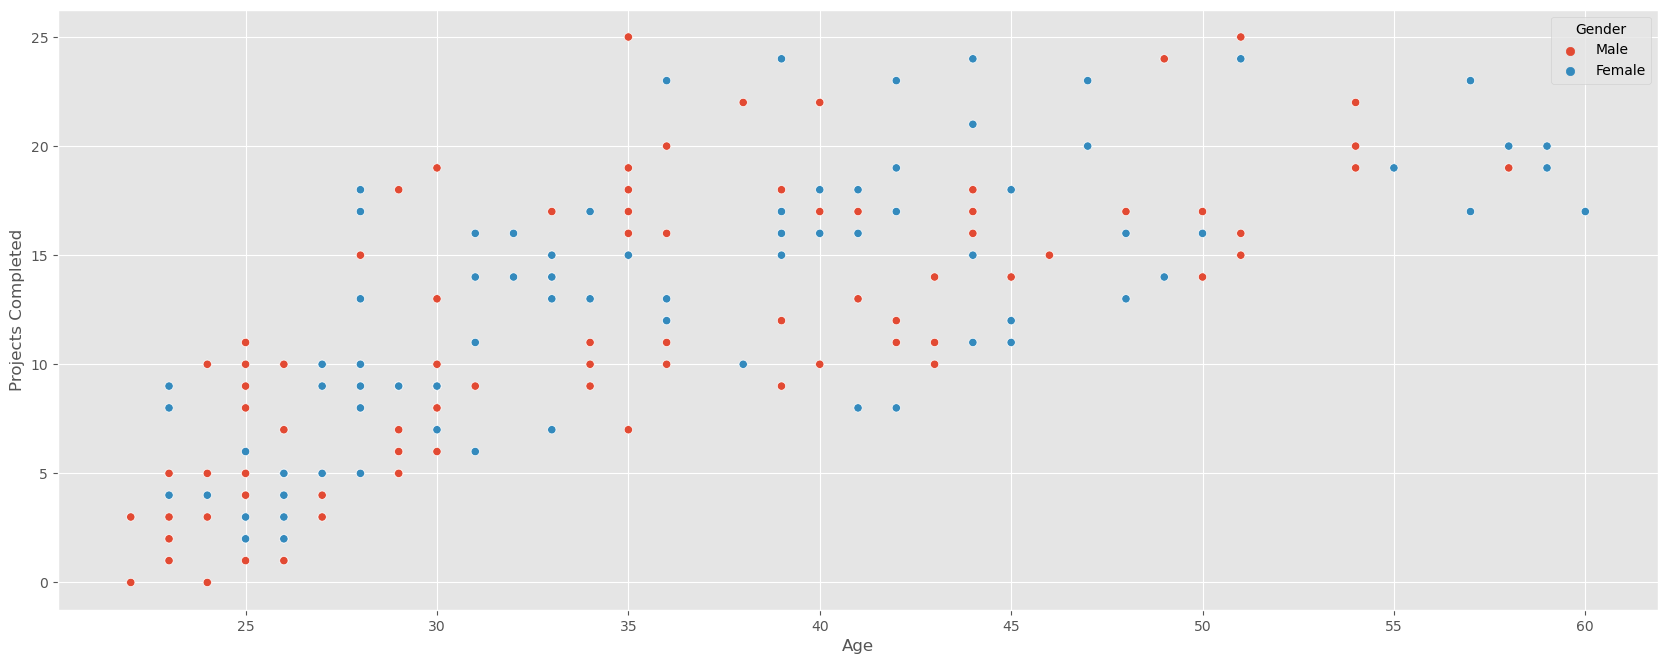

In [3]:
fig_1 = plt.figure(figsize = (8, 6))
axes = fig_1.add_axes([2,2,2,1])
axes = sns.scatterplot(data = hr_df, x = "Age", y = "Projects Completed", hue = "Gender")

# Check for correlation

C:\Users\ATARA\AppData\Local\Temp\ipykernel_12512\2546600783.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df_cor = hr_df.corr().round(2)
C:\Users\ATARA\AppData\Local\Temp\ipykernel_12512\2546600783.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(hr_df.corr().round(2), annot = True)


Text(0.5, 1.0, 'Employee Productivity and Satisfaction')

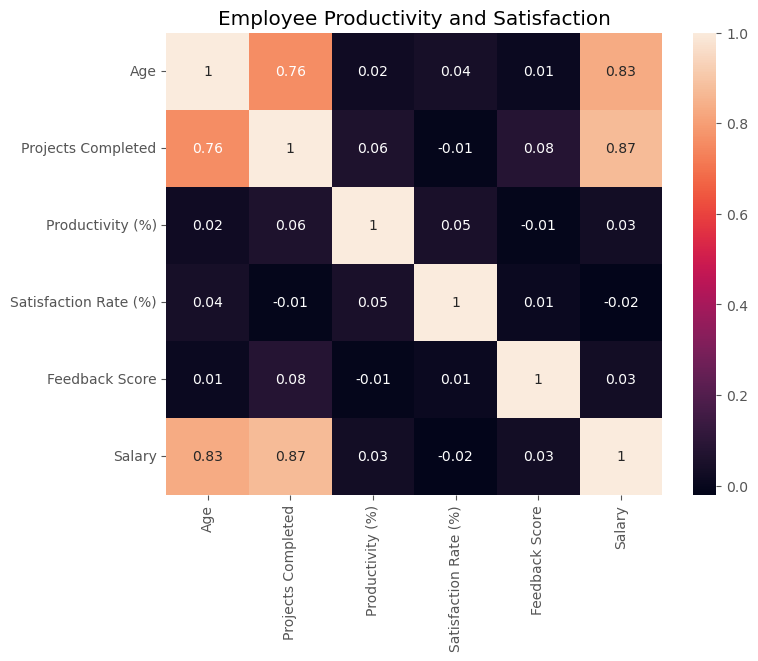

In [4]:
hr_df_cor = hr_df.corr().round(2)
hr_df_cor.head()

#creating a heatmap for the dataset
plt.figure(figsize = (8, 6))
plot = sns.heatmap(hr_df.corr().round(2), annot = True)
plot.set_title("Employee Productivity and Satisfaction")

There's a high correlation between age to projects completed, age to salary and lastly projects completed to salary.

# Train and Test sets

In [7]:
# Splitting the varaibles as training and testing
x = hr_df["Age"]
y = hr_df["Projects Completed"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# check for train
x_train
y_train

# Adding a constant to get an intercept
x_data_sm = sm.add_constant(x_train)
x_data_sm

,const,Age
74,1.0,26
3,1.0,26
185,1.0,36
26,1.0,45
90,1.0,26
...,...,...
87,1.0,44
103,1.0,54
67,1.0,41
24,1.0,40


After adding the constant, we can start to fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. After that, we’ll see the parameters,c and m of the straight line.

In [8]:
hr_df_cor = hr_df.corr().round(2)
hr_df_cor.head()

C:\Users\ATARA\AppData\Local\Temp\ipykernel_12512\642817353.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df_cor = hr_df.corr().round(2)


,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
Age,1.00,0.76,0.02,0.04,0.01,0.83
Projects Completed,0.76,1.00,0.06,-0.01,0.08,0.87
Productivity (%),0.02,0.06,1.00,0.05,-0.01,0.03
Satisfaction Rate (%),0.04,-0.01,0.05,1.00,0.01,-0.02
Feedback Score,0.01,0.08,-0.01,0.01,1.00,0.03


In [57]:
reg = linear_model.LinearRegression()
reg.fit(hr_df[["Age"]],hr_df.Projects_Completed)

LinearRegression()

This linear regression is ready to predict the projects completed.

In [58]:
#predict the projects completed by age
reg.predict([[54]])

C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.05412559])

In [59]:
reg.coef_

array([0.49607884])

In [60]:
reg.intercept_

-5.73413187446012

In [61]:
# y = m*x+b
0.49607884*54+-5.73413187446012

21.054125485539885